In [28]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [42]:
# img = cv2.imread(r"C:\Users\muthu\OneDrive\Pictures\Camera Roll\WIN_20240902_15_18_08_Pro.jpg")

#for Muthu
#img = cv2.imread(r'C:\Users\muthu\Documents\bill_ocr\60c4199364474569561cba359d486e6c69ae8cba.jpeg')


# for Chan
#img = cv2.imread(r'C:\Users\chand\Documents\GitHub\iReadYourBills\60c4199364474569561cba359d486e6c69ae8cba.jpeg')

#for kaufland
#img = cv2.imread(r'C:\Users\chand\Documents\GitHub\iReadYourBills\kaufland_4.webp')

#for edeka
# img = cv2.imread(r"C:\Users\chand\Documents\GitHub\iReadYourBills\edeka\EdekaBon17-jan.jpg")
# img = cv2.imread(r"C:\Users\chand\Documents\GitHub\iReadYourBills\edeka\edeka rees\1_noflash.jpg")\
img = cv2.imread(r"C:\Users\chand\Documents\GitHub\iReadYourBills\edeka\edeka rees\BW.png")



In [43]:
# img= img[100:900, 100:900]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
# blur = cv2.medianBlur(gray,11)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU)

# thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2) #previously just thresh_binary 
# thresh = cv2.threshold(blur, 128,255,cv2.THRESH_BINARY)[1]

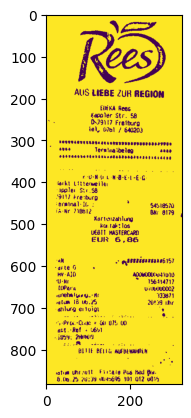

In [44]:
plt.imshow(thresh)
plt.show()

1


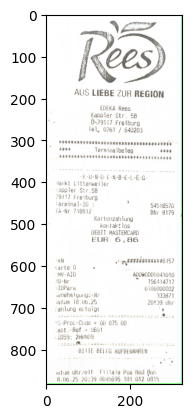

In [45]:
result = img.copy()
#canny = cv2.Canny(blur, 10, 100)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
print(len(contours)) #Prints the number of contours found.
sort_list = sorted(contours, key=lambda x: cv2.contourArea(x))
# count = 0
x,y,w,h = cv2.boundingRect(sort_list[len(contours)-1]) 

cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0),2)
result = result[y:y+h, x:x+w]
# print(sort)
# for cont in sort:
#     x,y,w,h = cv2.boundingRect(cont)
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # count = count+1
plt.imshow(result)
plt.show()

In [16]:
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#Chan
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [46]:
print(pytesseract.image_to_string(result))

\=-

i

€€S

AUS LIEBE ZUR REGION

EQEKA Rees
Kappler Str. 68
Ke OS79117 Freiburg
Tel, 0761 / 640203

SHEERS CaS pbbobrernrer Ere ree
eee Terminalbeleg cred
HERERO EEE ERE EEE

E-N-B-E
siarkt Littenneiler

54618570
Bir 8179
Kartenzahlung
kontakt los
DEBIT MASTERCARD
EUR 6,86
“AN econyiititniran a6 157
varteO +
MV-AID 4208000001010
U-nt 156414717
ToPara ‘vinuevoo02
ienehn igungs-Hr 333871
jatum 18.05.25 20259 Uhr
ahlung erfoigt ’
“9-Proc-Code = 00 O75 00
apt.-Ref.= O65!
»AD59; 24ND
BITTE BELEG AUFBEWAHREN

jatum Unrveit Filiale Pos Hed Bo
6.06.25 20:39 00:




In [ ]:
# Muthu code



text = pytesseract.image_to_string(result)
text = print(text.split()) 
if flag == 'kaufland':

    for index, i in enumerate(text):  #index is a number val and i is the string name.
        print(i)
        

        if i == 'Summe':
            print(i)
            break
    # print(text[index+1])
    
# print(index,i)
        

# print(text[index])

In [47]:
text = pytesseract.image_to_string(result)
words_caseinsens = text.split()
print(words_caseinsens)

['\\=-', 'i', '€€S', 'AUS', 'LIEBE', 'ZUR', 'REGION', 'EQEKA', 'Rees', 'Kappler', 'Str.', '68', 'Ke', 'OS79117', 'Freiburg', 'Tel,', '0761', '/', '640203', 'SHEERS', 'CaS', 'pbbobrernrer', 'Ere', 'ree', 'eee', 'Terminalbeleg', 'cred', 'HERERO', 'EEE', 'ERE', 'EEE', 'E-N-B-E', 'siarkt', 'Littenneiler', '54618570', 'Bir', '8179', 'Kartenzahlung', 'kontakt', 'los', 'DEBIT', 'MASTERCARD', 'EUR', '6,86', '“AN', 'econyiititniran', 'a6', '157', 'varteO', '+', 'MV-AID', '4208000001010', 'U-nt', '156414717', 'ToPara', '‘vinuevoo02', 'ienehn', 'igungs-Hr', '333871', 'jatum', '18.05.25', '20259', 'Uhr', 'ahlung', 'erfoigt', '’', '“9-Proc-Code', '=', '00', 'O75', '00', 'apt.-Ref.=', 'O65!', '»AD59;', '24ND', 'BITTE', 'BELEG', 'AUFBEWAHREN', 'jatum', 'Unrveit', 'Filiale', 'Pos', 'Hed', 'Bo', '6.06.25', '20:39', '00:']


In [57]:
# Chan trial code
from datetime import datetime
words = [w.lower() for w in words_caseinsens]
expense_csv = []
date_csv = []
flag = ''
print(words)
if "kaufland" in words:
    if "summe" in words or "eur" in words:
        flag = 'kaufland'
        index = words.index("summe") if "summe" in words else words.index("eur")
        #print(words[index + 1])  # Print the value after "Summe" or "EUR"
        expense_csv.append(words[index+1])
        print(expense_csv)
   
    if "datum" in words:
        index_1 = words.index("datum")
        date_csv.append(words[index_1 +1])
        

elif "eedeka" or "edeka" or "rees" in words:
    if "summe" in words:
        flag = 'edeka'
        index = words.index("summe")
        print("edeka detected")
        #print(words[index + 1])  # Print the value after "Summe"
        expense_csv.append(words[index+2])
    if "eur" in words:
        flag = 'edeka'
        index = words.index("eur")
        expense_csv.append(words[index + 1])  # Print the value before "EUR"
        #print(expense_csv)

    if "datum" or "jatum" in words:
        index_1 = words.index("datum") if "datum" in words else words.index("jatum")
        for i in range (index_1, len(words)):
            try:

                date_obj = datetime.strptime(words[i], "%d.%m.%y")
                #print(date_obj)
                date_csv.append(words[i])

            except:
                pass


        
        # date_csv.append(words[index_1 +6])
        #print(date_csv)
        
        
        

        

['\\=-', 'i', '€€s', 'aus', 'liebe', 'zur', 'region', 'eqeka', 'rees', 'kappler', 'str.', '68', 'ke', 'os79117', 'freiburg', 'tel,', '0761', '/', '640203', 'sheers', 'cas', 'pbbobrernrer', 'ere', 'ree', 'eee', 'terminalbeleg', 'cred', 'herero', 'eee', 'ere', 'eee', 'e-n-b-e', 'siarkt', 'littenneiler', '54618570', 'bir', '8179', 'kartenzahlung', 'kontakt', 'los', 'debit', 'mastercard', 'eur', '6,86', '“an', 'econyiititniran', 'a6', '157', 'varteo', '+', 'mv-aid', '4208000001010', 'u-nt', '156414717', 'topara', '‘vinuevoo02', 'ienehn', 'igungs-hr', '333871', 'jatum', '18.05.25', '20259', 'uhr', 'ahlung', 'erfoigt', '’', '“9-proc-code', '=', '00', 'o75', '00', 'apt.-ref.=', 'o65!', '»ad59;', '24nd', 'bitte', 'beleg', 'aufbewahren', 'jatum', 'unrveit', 'filiale', 'pos', 'hed', 'bo', '6.06.25', '20:39', '00:']


In [49]:
date_csv

['18.05.25', '6.06.25']

In [ ]:

from datetime import datetime
ran = words[words.index("datum")+6]
# print(int(ran))
# print(ran.isnumeric())
ran = "1dnfi" 
date_obj = datetime.strptime(ran, "%d.%m.%y")
# format = '%d/%m/%Y'
# res = datetime.datetime.strptime(ran, format).date()
print(date_obj)

In [58]:
data ={"Shop":[flag], "Date":[date_csv], "expense":[expense_csv]}
#print(data)
df = pd.DataFrame(data)

df.index+=1
print(df)
df.to_csv('list.csv', index = True, index_label="ID", header = True)  # Append to the CSV file


    Shop                 Date expense
1  edeka  [18.05.25, 6.06.25]  [6,86]


In [59]:
df

,Shop,Date,expense
1,edeka,"[18.05.25, 6.06.25]","[6,86]"


In [ ]:
# cap = cv2.VideoCapture(1)
# i = 0
# flag = 'kaufland'
# while True:
#     i=i+1
#     ret, frame = cap.read()
    
#     cv2.imshow("frame", frame)
#     # if i>100:
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     blur = cv2.GaussianBlur(gray, (3,3), 0)
#     ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
#     result = frame.copy()
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     # print(len(contours))
#     sort = sorted(contours, key=lambda x: cv2.contourArea(x))
#     x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
#     result = result[y:y+h, x:x+w]
#     text = pytesseract.image_to_string(result)
#     text = text.split()
#     # print(text)
    
#     # if flag == 'kaufland':
#     for i in range(len(text)):
        
#         if text[i] in centers:
#             shop = text[i]
#         # else:
#         #     shop = "not found"
    

#         if text[i] == 'Summe':
#         # print(text[i+1])
#             num = text[i+1]
#         # else:
#         #     num = "not found"
    
    
#         if text[i] == 'Datum':
#             date = text[i+1]
#         # else:
#         #     date = "not found"
        
    
        

#     #         # print(i)
            

#     #         if i == 'Summe':
#     #             print(i)
#     #             break
#     # print(text[index+1])
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
# contributor = 'Muthu'

# Shop = shop
# date = date
# cost = num

# df.loc[len(df)] = [contributor, Shop, date, cost]
# print(df)

  Contributor       Shop       Date       Cost
0       Muthu  not found  not found  not found
1       Muthu   Kaufland  not found  not found
2       Muthu  not found  not found  not found
3       Muthu  not found  not found  not found
4       Muthu  not found  not found  not found
5       Muthu   Kaufland         00  not found
6       Muthu   Kaufland  :03.12.23  not found
7       Muthu   Kaufland  :03.12.23  not found
8       Muthu   Kaufland  :03.12.23  not found
9       Muthu   Kaufland  :03.12.23       0/99
